In [1]:
# import IPython.core.display as di
# from IPython.core.display import display, HTML
# from IPython.display import Audio
# display(HTML("<style>.container { width:100% !important; }</style>"))
# di.display_html("""
# <style>.cell { margin-bottom: 40px !important;}</style>

# """, raw=True)
# from IPython.core.display import display, HTML
# display(HTML("<style>.container { height:100% !important; }</style>"))


from IPython.display import Audio
def alarm():
      display(Audio(url='https://sound.peal.io/ps/audios/000/000/537/original/woo_vu_luvub_dub_dub.wav', autoplay=True))

In [4]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
# from scipy.optimize import curve_fit
# from scipy.special import expit,logit
from datetime import date
import matplotlib as mpl
import time
# from scipy import stats
mpl.style.use('classic')
pd.options.mode.chained_assignment = None

In [5]:
start = time.time()
df1 = pd.read_pickle('../arm_bandit/kirk/kirk.pkl')
nd = time.time()
print(nd-start)

10.840019941329956


In [6]:
df1.columns

Index(['trial', 'trialstart', 'trialstop', 'ITIstart', 'ITIend', 'fixOn',
       'fixAcq', 'fixOff', 'fixHoldTime', 'overlap', 'whichTargOn', 'targOn',
       'targAcq', 'targOff', 'juiceTime', 'trialFeedbackT', 'totalFeedbackT',
       'rwd', 'choice', 'correct', 'rewarded', 'rwdDice', 'chosenTargOrigin',
       'jackpot', 'stimTrial', 'stimSOA', 'stimOnAfter', 'stimOnTime', 'theta',
       'probe', 'forced', 't1Rwd', 'targ1origin', 't2Rwd', 'targ2origin',
       't3Rwd', 'targ3origin', 'contrastIndex', 'contrasts', 'error',
       'errortype', 'eyedata', 'pcTime', 'trackerTime', 'trackerOffset',
       'block', 'rt', 'switch', 'state', 'eye', 'animal_date'],
      dtype='object')

In [7]:
df = df1[['trial','state', 'switch', 'stimTrial', 'rewarded','choice', 'correct','t1Rwd','t2Rwd','t3Rwd','animal_date','targOn','targAcq','rt']]

In [7]:
lastrwd = list(df['rewarded'].values)
b = ['NaN']
lastrwd = lastrwd+b
df['lastrwd'] = np.array(lastrwd[1:])


## filter data for correct sessions

In [22]:
df = df[df['trial']!=1]

In [6]:
# df['reac_time'] = df['targAcq'] - df['targOn']
a_list = df.groupby('animal_date').correct.mean().reset_index()
a_list = a_list[a_list['correct'] > 0.70]


In [7]:
df = df[df['animal_date'].isin(list(a_list['animal_date']))]


# count error trials as exploration

In [17]:
len(df)

34915

In [18]:
df = df[df['rewarded'] != 1]

In [19]:
len(df)

14274

In [20]:
df_stim = df[df['stimTrial'] == 1]
df_ns = df[df['stimTrial'] ==0]

In [21]:


df_stim['explore'] = np.where((df_stim['state'] == 1) | (df_stim['correct'] == 0) , 1,0)
stim_explore = df_stim.groupby(['animal_date']).explore.mean()

df_ns['explore'] = np.where((df_ns['state'] == 1) | (df_ns['correct'] == 0), 1,0)
ns_explore = df_ns.groupby(['animal_date']).explore.mean()

## don't count wrong trials

In [22]:
df = df1[['state', 'switch', 'stimTrial', 'rewarded','choice', 'correct','t1Rwd','t2Rwd','t3Rwd','animal_date']]
a_list = df.groupby('animal_date').correct.mean().reset_index()
a_list = a_list[a_list['correct'] > 0.70]

df = df[df['rewarded'] == 1] # setting for reward true

df_stim = df[df['stimTrial'] == 1]
df_ns = df[df['stimTrial'] ==0]

df_stim['explore'] = np.where((df_stim['state'] == 1) | (df_stim['correct'] == 1) , 1,0)
stim_explore_rwd = df_stim.groupby(['animal_date']).explore.mean()

df_ns['explore'] = np.where((df_ns['state'] == 1) | (df_ns['correct'] == 0), 1,0)
ns_explore_rwd = df_ns.groupby(['animal_date']).explore.mean()

In [23]:
#  [stim_explore, stim_explore_rwd]

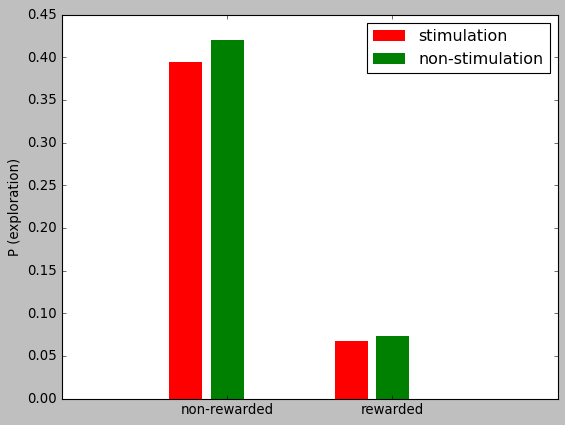

In [24]:
import matplotlib as mpl
mpl.style.use('classic')
x = np.array([0.2,0.6])
y = ns_explore
y2 = stim_explore
# fig.set_size_inches(5, 5)
plt.bar(x+0.1,
        [stim_explore.mean(), stim_explore_rwd.mean()] ,     
#        yerr=[np.std(y),np.std(y2)],    # error bars
       capsize=0, # error bar cap width in points
       width=0.08,    # bar width
       tick_label=["S", 'NS'],
       color=['red'],  # face color transparent
       edgecolor=(0,0,0,0),
       )
plt.bar(x+0.2,
        [ns_explore.mean(),ns_explore_rwd.mean()],      
#        yerr=[np.std(y),np.std(y2)],    # error bars
       capsize=0, # error bar cap width in points
       width=0.08,    # bar width
       tick_label=["non-rewarded", 'rewarded'],
       color=['green'],  # face color transparent
       edgecolor=(0,0,0,0),
       )
plt.xlim(0, 1.2)
plt.ylabel('P (exploration)')
plt.legend(['stimulation', 'non-stimulation'], loc = 'best')
plt.show()

### exploration done - we can add scatter points, or we can do a violin curve, we will see.
### Let's move on to reaction time

In [36]:
df1.columns

Index(['trial', 'trialstart', 'trialstop', 'ITIstart', 'ITIend', 'fixOn',
       'fixAcq', 'fixOff', 'fixHoldTime', 'overlap', 'whichTargOn', 'targOn',
       'targAcq', 'targOff', 'juiceTime', 'trialFeedbackT', 'totalFeedbackT',
       'rwd', 'choice', 'correct', 'rewarded', 'rwdDice', 'chosenTargOrigin',
       'jackpot', 'stimTrial', 'stimSOA', 'stimOnAfter', 'stimOnTime', 'theta',
       'probe', 'forced', 't1Rwd', 'targ1origin', 't2Rwd', 'targ2origin',
       't3Rwd', 'targ3origin', 'contrastIndex', 'contrasts', 'error',
       'errortype', 'eyedata', 'pcTime', 'trackerTime', 'trackerOffset',
       'block', 'rt', 'switch', 'state', 'eye', 'animal_date'],
      dtype='object')

In [35]:
targacq = df1['targAcq'].values()

= df1

,trial,trialstart,trialstop,ITIstart,ITIend,fixOn,fixAcq,fixOff,fixHoldTime,overlap,...,eyedata,pcTime,trackerTime,trackerOffset,block,rt,switch,state,eye,animal_date
0,1,347936.797211,347938.451932,347936.802274,347937.687437,347937.692868,347937.938981,NaN,0.450562,0.050768,...,"[[nan, 85930109.0, 85930110.0, 85930111.0, 859...",347938.553126,14267,262006.590126,1,NaN,NaN,NaN,"[[nan, nan, nan, nan], [347936.69912607037, 18...",170901
1,2,347938.629326,347940.848341,347938.632294,347939.745547,347939.750174,347939.868204,347940.358288,0.421887,0.055712,...,"[[nan, 85931971.0, 85931972.0, 85931973.0, 859...",347940.948863,16662,262006.590863,1,0.210967,1.0,1.0,"[[nan, nan, nan, nan], [347938.5618627828, 23....",170901


#### also we want to plot reaction times, we can do bar plot but let's do distribution first
##### Reaction time is targAcq-targOn

In [13]:
# df = df1[['state', 'switch', 'stimTrial', 'rewarded','choice', 'correct',
#           't1Rwd','t2Rwd','t3Rwd','animal_date','targOn','targAcq','rt']]

# df['reac_time'] = df['targAcq'] - df['targOn']
# df = df.dropna() # cleaning the data

# # Let's remove the outliers as well

# df['z'] = np.abs(stats.zscore(df['rt']))
# print(len(df))
# df = df[df['z'] <= 3]
# print(f'after removing result is {len(df)}')

df['explore'] = np.where((df['state'] == 1), 1,0)

## Let's define function for probability differences - jensen shannon divergence [link](https://machinelearningmastery.com/divergence-between-probability-distributions/#:~:text=KL%20divergence%20can%20be%20calculated,of%20the%20event%20in%20P.&text=The%20value%20within%20the%20sum%20is%20the%20divergence%20for%20a%20given%20event.). Also performing Kolmogorov-Smirnov test
### Lets plot all four type of graphs 
### Stimulation - explore - exploit (4)
### Reward  - explore - exploit(4)

In [28]:
from math import log2

def kl_divergence(p, q):
    return sum(p[i] * log2(p[i]/q[i]) for i in range(len(p)))
 
# calculate the js divergence
def js_divergence(p, q):
    m = 0.5 * (p + q)
    return 0.5 * kl_divergence(p, m) + 0.5 * kl_divergence(q, m)

In [40]:
# define colors
stim_c = 'r'
n_stim_c = 'b'

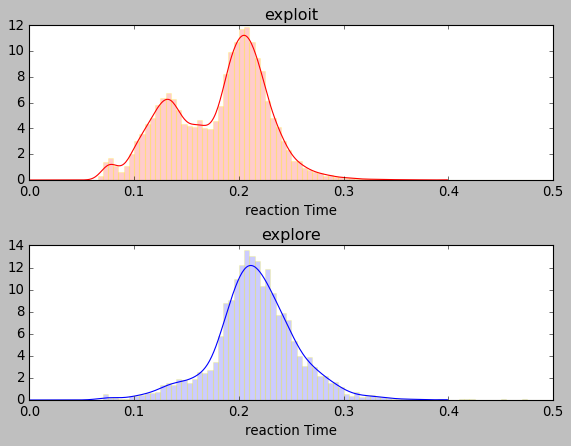

In [32]:
#stimulation

df_stim_oit = df[(df['explore'] ==0)].rt # stimulation + exploit
df_stim_ore = df[(df['explore'] ==1)].rt # stimulation + explore


density_s = stats.gaussian_kde(df_stim_oit)
density_ns = stats.gaussian_kde(df_stim_ore)
x = np.arange(0,0.4,0.001)

fig, ax = plt.subplots(nrows=2, ncols=1)
fig.tight_layout(pad = 3.0)

ax[0].hist(df_stim_oit,bins = np.arange(0,0.5,0.005), label='stimulated', alpha=0.2,color = 'r',  density = True,edgecolor='yellow')[2] #row=0, col=0
ax[0].set_xlabel('reaction Time')
ax[0].set_title('exploit')
ax[0].plot(x,density_s(x),'r')
ax[1].hist(df_stim_ore,bins = np.arange(0,0.5,0.005), label='stimulated', alpha=0.2,color = 'b',  density = True,edgecolor='yellow')[2] #row=0, col=0
ax[1].set_xlabel('reaction Time')
ax[1].set_title('explore')# _ = plt.hist(df_stim,bins = np.arange(0,0.5,0.005), label='stimulated', alpha=0.2,color = 'r',  density = True,edgecolor='yellow')
ax[1].plot(x,density_ns(x))

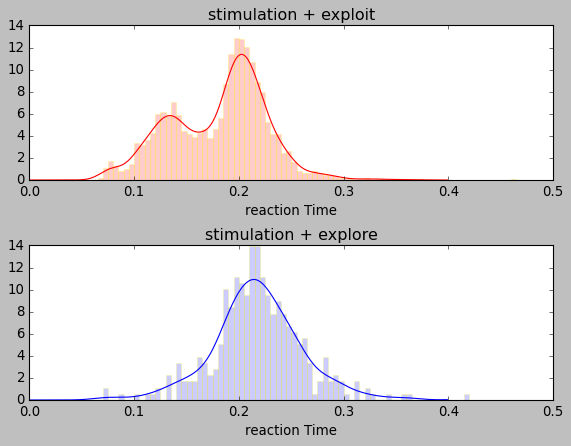

In [30]:
#stimulation

df_stim_oit = df[(df['stimTrial'] ==1) & (df['explore'] ==0)].rt # stimulation + exploit
df_stim_ore = df[(df['stimTrial'] ==1) & (df['explore'] ==1)].rt # stimulation + explore


density_s = stats.gaussian_kde(df_stim_oit)
density_ns = stats.gaussian_kde(df_stim_ore)
x = np.arange(0,0.4,0.001)

fig, ax = plt.subplots(nrows=2, ncols=1)
fig.tight_layout(pad = 3.0)

ax[0].hist(df_stim_oit,bins = np.arange(0,0.5,0.005), label='stimulated', alpha=0.2,color = 'r',  density = True,edgecolor='yellow')[2] #row=0, col=0
ax[0].set_xlabel('reaction Time')
ax[0].set_title('stimulation + exploit')
ax[0].plot(x,density_s(x),'r')
ax[1].hist(df_stim_ore,bins = np.arange(0,0.5,0.005), label='stimulated', alpha=0.2,color = 'b',  density = True,edgecolor='yellow')[2] #row=0, col=0
ax[1].set_xlabel('reaction Time')
ax[1].set_title('stimulation + explore')# _ = plt.hist(df_stim,bins = np.arange(0,0.5,0.005), label='stimulated', alpha=0.2,color = 'r',  density = True,edgecolor='yellow')
ax[1].plot(x,density_ns(x))



no stimulation + exploit vs stimulation + exploit

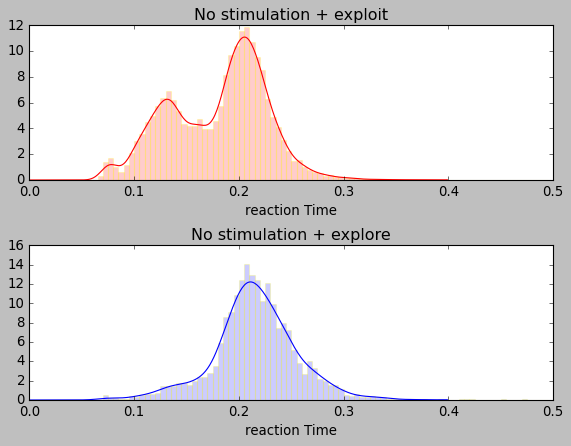

In [31]:
#stimulation

df_stim_oit = df[(df['stimTrial'] ==0) & (df['explore'] ==0)].rt # stimulation + exploit
df_stim_ore = df[(df['stimTrial'] ==0) & (df['explore'] ==1)].rt # stimulation + explore


density_s = stats.gaussian_kde(df_stim_oit)
density_ns = stats.gaussian_kde(df_stim_ore)
x = np.arange(0,0.4,0.001)

fig, ax = plt.subplots(nrows=2, ncols=1)
fig.tight_layout(pad = 3.0)

ax[0].hist(df_stim_oit,bins = np.arange(0,0.5,0.005), label='stimulated', alpha=0.2,color = 'r',  density = True,edgecolor='yellow')[2] #row=0, col=0
ax[0].set_xlabel('reaction Time')
ax[0].set_title('No stimulation + exploit')
ax[0].plot(x,density_s(x),'r')
ax[1].hist(df_stim_ore,bins = np.arange(0,0.5,0.005), label='stimulated', alpha=0.2,color = 'b',  density = True,edgecolor='yellow')[2] #row=0, col=0
ax[1].set_xlabel('reaction Time')
ax[1].set_title('No stimulation + explore')# _ = plt.hist(df_stim,bins = np.arange(0,0.5,0.005), label='stimulated', alpha=0.2,color = 'r',  density = True,edgecolor='yellow')
ax[1].plot(x,density_ns(x))

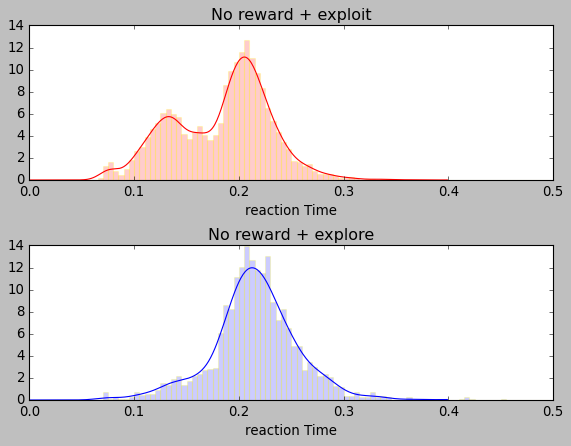

In [33]:
df_stim_oit = df[(df['rewarded'] ==0) & (df['explore'] ==0)].rt # stimulation + exploit
df_stim_ore = df[(df['rewarded'] ==0) & (df['explore'] ==1)].rt # stimulation + explore


density_s = stats.gaussian_kde(df_stim_oit)
density_ns = stats.gaussian_kde(df_stim_ore)
x = np.arange(0,0.4,0.001)

fig, ax = plt.subplots(nrows=2, ncols=1)
fig.tight_layout(pad = 3.0)

ax[0].hist(df_stim_oit,bins = np.arange(0,0.5,0.005), label='stimulated', alpha=0.2,color = 'r',  density = True,edgecolor='yellow')[2] #row=0, col=0
ax[0].set_xlabel('reaction Time')
ax[0].set_title('No reward + exploit')
ax[0].plot(x,density_s(x),'r')
ax[1].hist(df_stim_ore,bins = np.arange(0,0.5,0.005), label='stimulated', alpha=0.2,color = 'b',  density = True,edgecolor='yellow')[2] #row=0, col=0
ax[1].set_xlabel('reaction Time')
ax[1].set_title('No reward + explore')# _ = plt.hist(df_stim,bins = np.arange(0,0.5,0.005), label='stimulated', alpha=0.2,color = 'r',  density = True,edgecolor='yellow')
ax[1].plot(x,density_ns(x))

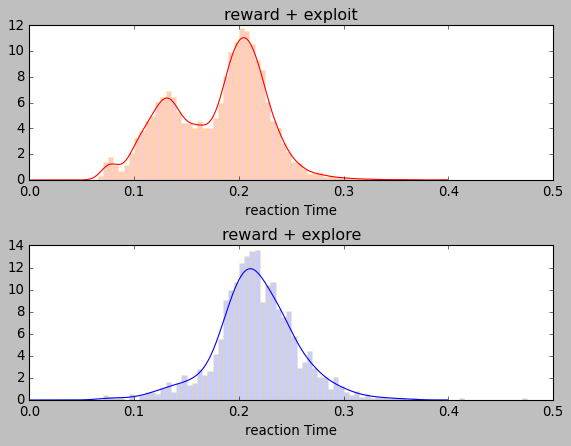

In [34]:
df_stim_oit = df[(df['rewarded'] ==1) & (df['explore'] ==0)].rt # stimulation + exploit
df_stim_ore = df[(df['rewarded'] ==1) & (df['explore'] ==1)].rt # stimulation + explore


density_s = stats.gaussian_kde(df_stim_oit)
density_ns = stats.gaussian_kde(df_stim_ore)
x = np.arange(0,0.4,0.001)

fig, ax = plt.subplots(nrows=2, ncols=1)
fig.tight_layout(pad = 3.0)

ax[0].hist(df_stim_oit,bins = np.arange(0,0.5,0.005), label='stimulated', alpha=0.2,color = 'r',  density = True,edgecolor='yellow')[2] #row=0, col=0
ax[0].set_xlabel('reaction Time')
ax[0].set_title('reward + exploit')
ax[0].plot(x,density_s(x),'r')
ax[1].hist(df_stim_ore,bins = np.arange(0,0.5,0.005), label='stimulated', alpha=0.2,color = 'b',  density = True,edgecolor='yellow')[2] #row=0, col=0
ax[1].set_xlabel('reaction Time')
ax[1].set_title('reward + explore')# _ = plt.hist(df_stim,bins = np.arange(0,0.5,0.005), label='stimulated', alpha=0.2,color = 'r',  density = True,edgecolor='yellow')
ax[1].plot(x,density_ns(x))

In [26]:
df

,trial,state,switch,stimTrial,rewarded,choice,correct,t1Rwd,t2Rwd,t3Rwd,animal_date,targOn,targAcq,rt,lastrwd,explore
1,2,1.0,1.0,0,1.0,2.0,1,70,70,40,170901,347940.298544,347940.509511,0.210967,0.0,1
2,3,1.0,1.0,0,0.0,3.0,1,70,70,40,170901,347943.951158,347944.163697,0.212539,0.0,1
3,4,2.0,1.0,0,0.0,1.0,1,70,70,40,170901,347946.557026,347946.772179,0.215154,1.0,0
4,5,2.0,0.0,0,1.0,1.0,1,70,70,40,170901,347948.837189,347949.038935,0.201746,1.0,0
6,7,1.0,1.0,0,1.0,2.0,1,70,70,40,170901,347952.970195,347953.234092,0.263897,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1624,373,4.0,0.0,0,1.0,3.0,1,80,70,90,171031,346533.090659,346533.209348,0.118689,1.0,0
1625,374,4.0,0.0,0,1.0,3.0,1,80,70,90,171031,346535.122221,346535.342390,0.220168,0.0,0
1627,376,4.0,0.0,0,0.0,3.0,1,80,70,90,171031,346539.330618,346539.556148,0.225530,1.0,0
1628,377,1.0,1.0,0,1.0,2.0,1,80,70,90,171031,346541.396009,346541.649599,0.253589,0.0,1


In [39]:
sum(df['lastrwd'] == 1.0 )

0

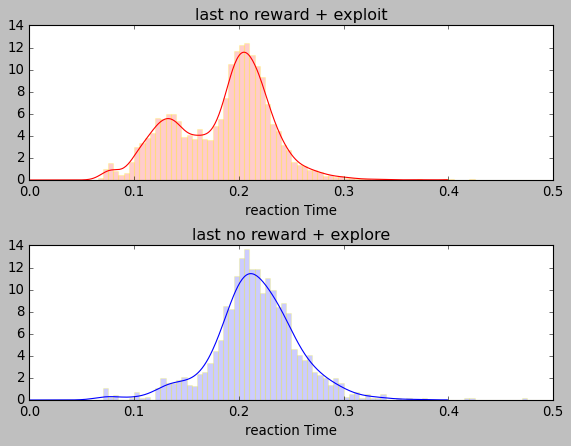

In [8]:
df_stim_oit = df[(df['lastrwd'] =='0.0') & (df['explore'] ==0)].rt # last reward + exploit
df_stim_ore = df[(df['lastrwd'] =='0.0') & (df['explore'] ==1)].rt # last reward + explore


density_s = stats.gaussian_kde(df_stim_oit)
density_ns = stats.gaussian_kde(df_stim_ore)
x = np.arange(0,0.4,0.001)

fig, ax = plt.subplots(nrows=2, ncols=1)
fig.tight_layout(pad = 3.0)

ax[0].hist(df_stim_oit,bins = np.arange(0,0.5,0.005), label='stimulated', alpha=0.2,color = 'r',  density = True,edgecolor='yellow')[2] #row=0, col=0
ax[0].set_xlabel('reaction Time')
ax[0].set_title('last no reward + exploit')
ax[0].plot(x,density_s(x),'r')
ax[1].hist(df_stim_ore,bins = np.arange(0,0.5,0.005), label='stimulated', alpha=0.2,color = 'b',  density = True,edgecolor='yellow')[2] #row=0, col=0
ax[1].set_xlabel('reaction Time')
ax[1].set_title('last no reward + explore')# _ = plt.hist(df_stim,bins = np.arange(0,0.5,0.005), label='stimulated', alpha=0.2,color = 'r',  density = True,edgecolor='yellow')
ax[1].plot(x,density_ns(x))

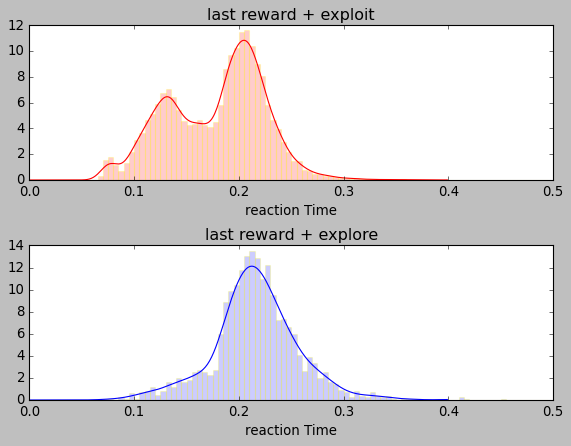

In [40]:
df_stim_oit = df[(df['lastrwd'] =='1.0') & (df['explore'] ==0)].rt # last reward + exploit
df_stim_ore = df[(df['lastrwd'] =='1.0') & (df['explore'] ==1)].rt # last reward + explore


density_s = stats.gaussian_kde(df_stim_oit)
density_ns = stats.gaussian_kde(df_stim_ore)
x = np.arange(0,0.4,0.001)

fig, ax = plt.subplots(nrows=2, ncols=1)
fig.tight_layout(pad = 3.0)

ax[0].hist(df_stim_oit,bins = np.arange(0,0.5,0.005), label='stimulated', alpha=0.2,color = 'r',  density = True,edgecolor='yellow')[2] #row=0, col=0
ax[0].set_xlabel('reaction Time')
ax[0].set_title('last reward + exploit')
ax[0].plot(x,density_s(x),'r')
ax[1].hist(df_stim_ore,bins = np.arange(0,0.5,0.005), label='stimulated', alpha=0.2,color = 'b',  density = True,edgecolor='yellow')[2] #row=0, col=0
ax[1].set_xlabel('reaction Time')
ax[1].set_title('last reward + explore')# _ = plt.hist(df_stim,bins = np.arange(0,0.5,0.005), label='stimulated', alpha=0.2,color = 'r',  density = True,edgecolor='yellow')
ax[1].plot(x,density_ns(x))

In [ ]:
df_stim_oit = df[(df['stimTrial'] ==0) & (df['explore'] ==0)].rt # stimulation + exploit
df_stim_ore = df[(df['stimTrial'] ==0) & (df['explore'] ==1)].rt # stimulation + explore


density_s = stats.gaussian_kde(df_stim_oit)
density_ns = stats.gaussian_kde(df_stim_ore)
x = np.arange(0,0.4,0.001)

fig, ax = plt.subplots(nrows=2, ncols=1)
fig.tight_layout(pad = 3.0)

ax[0].hist(df_stim_oit,bins = np.arange(0,0.5,0.005), label='stimulated', alpha=0.2,color = 'r',  density = True,edgecolor='yellow')[2] #row=0, col=0
ax[0].set_xlabel('reaction Time')
ax[0].set_title('No stimulation + exploit')
ax[0].plot(x,density_s(x),'r')
ax[1].hist(df_stim_ore,bins = np.arange(0,0.5,0.005), label='stimulated', alpha=0.2,color = 'b',  density = True,edgecolor='yellow')[2] #row=0, col=0
ax[1].set_xlabel('reaction Time')
ax[1].set_title('No stimulation + explore')# _ = plt.hist(df_stim,bins = np.arange(0,0.5,0.005), label='stimulated', alpha=0.2,color = 'r',  density = True,edgecolor='yellow')
ax[1].plot(x,density_ns(x))

Text(0, 0.5, 'probability')

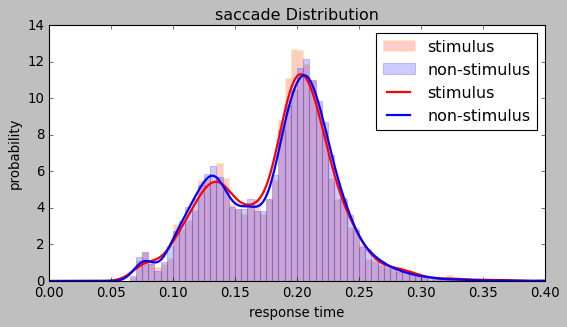

In [27]:
from math import log2

def kl_divergence(p, q):
    return sum(p[i] * log2(p[i]/q[i]) for i in range(len(p)))
 
# calculate the js divergence
def js_divergence(p, q):
    m = 0.5 * (p + q)
    return 0.5 * kl_divergence(p, m) + 0.5 * kl_divergence(q, m)



df_stim = df[(df['stimTrial'] ==1)].rt
df_stim_not = df[(df['stimTrial'] !=1)].rt
plt.figure(figsize=(8,4))
_ = plt.hist(df_stim,bins = np.arange(0,0.5,0.005), label='stimulated', alpha=0.2,color = 'r',  density = True,edgecolor='yellow')
 
# plotting second histogram
_ = plt.hist(df_stim_not,bins = np.arange(0,0.5,0.005), label='not-stimulated', alpha=0.2,color = 'b', density = True,edgecolor='blue')
plt.xlim(0,0.4)
plt.title('saccade Distribution')
density_s = stats.gaussian_kde(df_stim)
density_ns = stats.gaussian_kde(df_stim_not)
x = np.arange(0,0.4,0.001)
plt.plot(x,density_s(x),'r',x,density_ns(x),'b', linewidth = 2) # change the colors
plt.legend(['stimulus', 'non-stimulus','stimulus', 'non-stimulus'])
plt.xlabel('response time')
plt.ylabel('probability')

### The stimulation and non-stimulation don't have a significant difference

In [28]:
print('jenson shanon divergence is '+ str(js_divergence(density_s(x),density_ns(x))) + ' bits')
from scipy.stats import ks_2samp,kstest
print('test between stimultion and non-stimulation ' + str(ks_2samp(df_stim, df_stim_not)))
# print('test between stimultion and normal population ' + str(kstest(df_stim, 'norm'))) # fit a simple, fitting
# # liklihood - ratio test, information criterian test.
# print('test between non-stimultion and normal population ' + str(kstest(df_stim_not, 'norm')))

jenson shanon divergence is 1.227414659922323 bits
test between stimultion and non-stimulation KstestResult(statistic=0.02066810318441703, pvalue=0.1073550843301081)


## EXPLORE vs. EXPLOIT

Text(0, 0.5, 'probability')

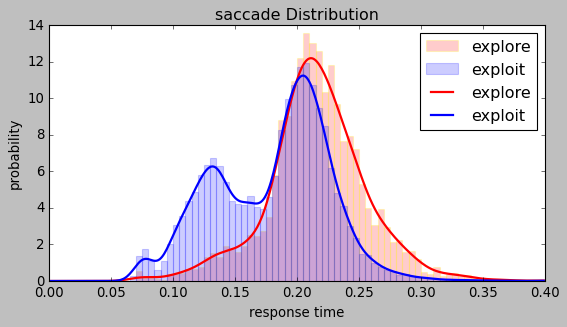

In [25]:
df['explore'] = np.where((df['state'] == 1), 1,0)
df_stim = df[(df['explore'] ==1)].rt
df_stim_not = df[(df['explore'] !=1)].rt
plt.figure(figsize=(8,4))
_ = plt.hist(df_stim,bins = np.arange(0,0.5,0.005), label='stimulated', alpha=0.2,color = 'r',  density = True,edgecolor='yellow')
 
# plotting second histogram
_ = plt.hist(df_stim_not,bins = np.arange(0,0.5,0.005), label='not-stimulated', alpha=0.2,color = 'b', density = True,edgecolor='blue')
plt.xlim(0,0.4)
plt.title('saccade Distribution')
density_s = stats.gaussian_kde(df_stim)
density_ns = stats.gaussian_kde(df_stim_not)
x = np.arange(0,0.4,0.001)
plt.plot(x,density_s(x),'r',x,density_ns(x),'b', linewidth = 2) # change the colors
plt.legend(['explore', 'exploit','explore', 'exploit'])
plt.xlabel('response time')
plt.ylabel('probability')

In [26]:
print('test between stimultion and non-stimulation ' + str(ks_2samp(df_stim, df_stim_not)))

test between stimultion and non-stimulation KstestResult(statistic=0.2975559399049369, pvalue=1.6964028401847375e-223)


## Explore and exploit are significantly different

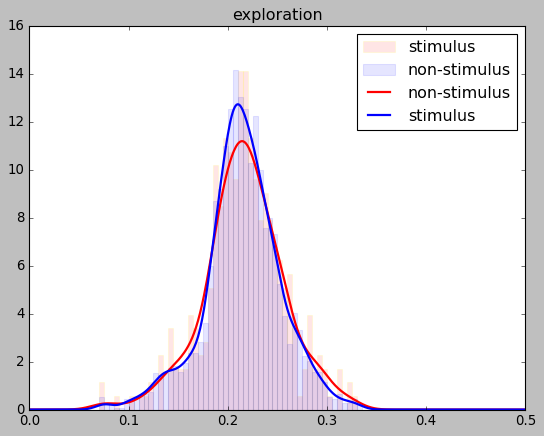

In [41]:
df_stim = df[(df['stimTrial'] ==1) & (df['explore'] ==1)].rt
df_stim_not = df[(df['stimTrial'] !=1) & (df['explore'] ==1)].rt
_ = plt.hist(df_stim,bins = np.arange(0,0.5,0.005), label='stimulated', alpha=0.1,color = stim_c,  density = True,edgecolor='yellow')
 
# plotting second histogram
_ = plt.hist(df_stim_not,bins = np.arange(0,0.5,0.005), label='not-stimulated', alpha=0.1,color = n_stim_c, density = True,edgecolor='blue')
plt.xlim(0,0.5)
plt.title('exploration')

# let's plot kernel of prob density as well

density_s = stats.gaussian_kde(df_stim)
density_ns = stats.gaussian_kde(df_stim_not)
x = np.arange(0,0.5,0.001)
plt.plot(x,density_s(x),stim_c,x,density_ns(x),n_stim_c,linewidth = 2)
plt.legend(['stimulus', 'non-stimulus','non-stimulus', 'stimulus'])

In [42]:
print('jenson shanon divergence is '+ str(js_divergence(density_s(x),density_ns(x))) + ' bits')
from scipy.stats import ks_2samp,kstest
print('test between stimultion and non-stimulation ' + str(ks_2samp(df_stim, df_stim_not)))
print('test between stimultion and normal population ' + str(kstest(df_stim, 'norm')))
print('test between non-stimultion and normal population ' + str(kstest(df_stim_not, 'norm')))

jenson shanon divergence is 3.539351920084078 bits
test between stimultion and non-stimulation KstestResult(statistic=0.045392698014272544, pvalue=0.520570197185232)
test between stimultion and normal population KstestResult(statistic=0.5336028171250183, pvalue=1.1190099243285091e-94)
test between non-stimultion and normal population KstestResult(statistic=0.5331129394802865, pvalue=0.0)


### But are these values significant??

# removing the incorrect trials


In [11]:
df = df1[['state', 'switch', 'stimTrial', 'rewarded','choice', 'correct','t1Rwd','t2Rwd','t3Rwd','animal_date']]
df = df.dropna()
a_list = df.groupby('animal_date').correct.mean().reset_index()
a_list = a_list[a_list['correct'] > 0.70]

df = df[df['rewarded'] == 1] # setting for reward true
df = df.dropna()
df_stim = df[df['stimTrial'] == 1]
df_ns = df[df['stimTrial'] ==0]

df_stim['explore'] = np.where((df_stim['state'] == 1) , 1,0)
stim_explore_rwd = df_stim.groupby(['animal_date']).explore.mean()

df_ns['explore'] = np.where((df_ns['state'] == 1), 1,0)
ns_explore_rwd = df_ns.groupby(['animal_date']).explore.mean()

In [12]:
df = df1[['state', 'switch', 'stimTrial', 'rewarded','choice', 'correct','t1Rwd','t2Rwd','t3Rwd','animal_date']]
df = df.dropna()
a_list = df.groupby('animal_date').correct.mean().reset_index()
a_list = a_list[a_list['correct'] > 0.70]

df = df[df['rewarded'] == 0] # setting for reward False

df_stim = df[df['stimTrial'] == 1]
df_ns = df[df['stimTrial'] ==0]

df_stim['explore'] = np.where((df_stim['state'] == 1) , 1,0)
stim_explore = df_stim.groupby(['animal_date']).explore.mean()

df_ns['explore'] = np.where((df_ns['state'] == 1), 1,0)
ns_explore = df_ns.groupby(['animal_date']).explore.mean()

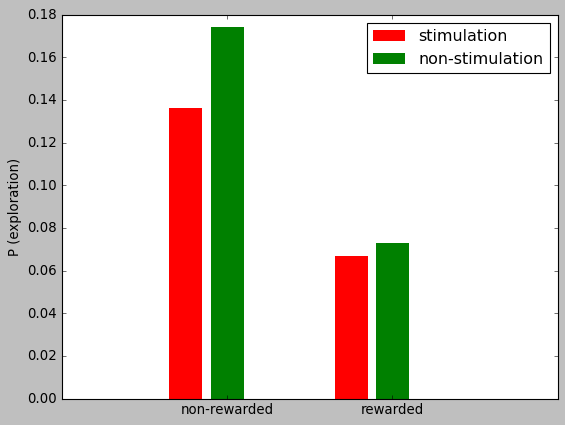

In [13]:
import matplotlib as mpl
mpl.style.use('classic')
x = np.array([0.2,0.6])
y = ns_explore
y2 = stim_explore
# fig.set_size_inches(5, 5)
plt.bar(x+0.1,
        [stim_explore.mean(), stim_explore_rwd.mean()],
        capsize=0, # error bar cap width in points
       width=0.08,    # bar width
       tick_label=["S", 'NS'],
       color=['red'],  # face color transparent
       edgecolor=(0,0,0,0),
       )
plt.bar(x+0.2,
        [ns_explore.mean(),ns_explore_rwd.mean()],      
#        yerr=[np.std(y),np.std(y2)],    # error bars
       capsize=0, # error bar cap width in points
       width=0.08,    # bar width
       tick_label=["non-rewarded", 'rewarded'],
       color=['green'],  # face color transparent
       edgecolor=(0,0,0,0),
       )
plt.xlim(0, 1.2)
plt.ylabel('P (exploration)')
plt.legend(['stimulation', 'non-stimulation'], loc = 'best')
plt.show()

### clearly the non-stimulation and stimulation reaction time are same and they are not from a normal distribution.

### Next step - analyse the express saccade in a fast manner without fitting the mixture model

In [14]:
df = df1[['state', 'switch', 'stimTrial', 'rewarded','choice', 'correct','t1Rwd','t2Rwd','t3Rwd','animal_date',
          'targOn','targAcq']].reset_index()
df['reac_time'] = df['targAcq'] - df['targOn']
df = df.dropna() # cleaning the data

# Let's remove the outliers as well

df['z'] = np.abs(stats.zscore(df['reac_time']))
print(len(df))
df = df[df['z'] <= 3]
print(f'after removing {len(df)}')

df['explore'] = np.where((df['state'] == 1), 1,0)

30684
after removing 30582


In [38]:
'''
From the past analysis we will take reaction time >0.09 & <0.15 as the xpress saccade
Now let's fiter them out and then we will look at the percentage of target bias in express vs normal saccade
during exploitation.


THINK THINK THINK !!!!

The question is the express saccades are exploiting choices to a specific target.

First - check if there is a bias to a specific choice

second - take the snippets of choices and then sum up the choices for express saccades.
'''

df_stim = df[(df['stimTrial'] ==1) & (df['explore'] ==0)]
df_stim_not = df[(df['stimTrial'] !=1) & (df['explore'] ==0)]

df_stim = df_stim[(df_stim['rt'] > 0.07)&(df_stim['rt'] < 0.15)]
df_stim_not = df_stim_not[(df_stim_not['rt'] > 0.07)&(df_stim_not['rt'] < 0.15)]

df_stim = df_stim.reset_index()
df_stim_not = df_stim_not.reset_index()

Text(0.5, 1.0, ' exploitation and express saccades')

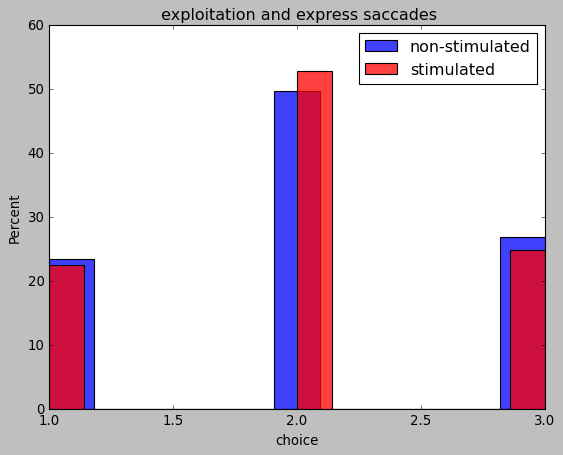

In [39]:

sns.histplot(data = df_stim, x = 'choice',stat = 'percent')


sns.histplot(data = df_stim_not, x = 'choice', stat = 'percent', color = 'red')
plt.legend(['non-stimulated','stimulated'])
plt.title(' exploitation and express saccades')

Text(0.5, 1.0, 'overall choices in the data during exploitation')

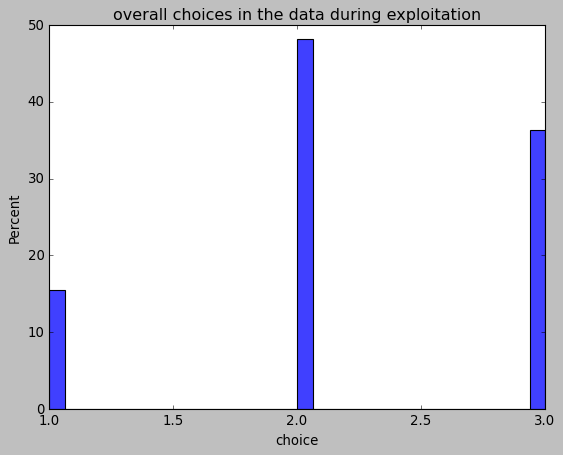

In [17]:
sns.histplot(data = df, x = 'choice',stat = 'percent')
plt.title('overall choices in the data during exploitation')

### So there is a clear bias in express sccades during exploit - but there is an overall bias as well.
#### However we can compare it to the exploration and normal saccades.
#### Then we can compare the reward choices correlating to the express saccades - pre emptive choices

Text(0.5, 1.0, ' exploration ')

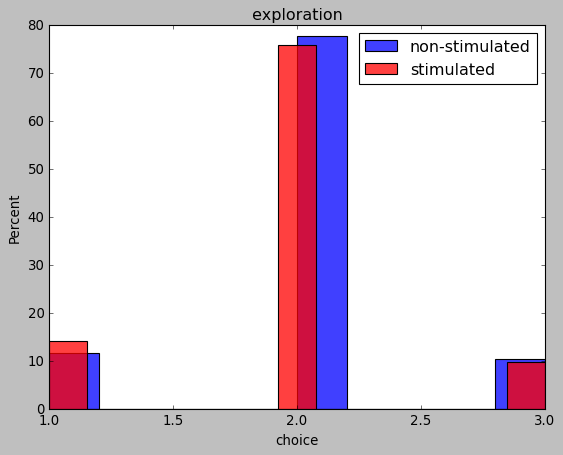

In [18]:
df_stim = df[(df['stimTrial'] ==1) & (df['explore'] ==1)].reset_index()
df_stim_not = df[(df['stimTrial'] !=1) & (df['explore'] ==1)].reset_index()

df_stim = df_stim[(df_stim['reac_time'] > 0.15)]
df_stim_not = df_stim_not[(df_stim_not['reac_time'] > 0.15)]



sns.histplot(data = df_stim, x = 'choice',stat = 'percent')

sns.histplot(data = df_stim_not, x = 'choice', stat = 'percent', color = 'red')
plt.legend(['non-stimulated','stimulated'])
plt.title(' exploration ')


#### The bias is even stronger but during during exploit choice 1 and choice 2 were stronger. Also we need to group them by session

#### Let's move to the reward history and train of express saccades irrespective of exploration and exploitation

In [19]:
'''
Lets think about the flow. we have sessions in a temporal order. 
Step 1 - how many continuous express saccdes occur between two explore choices,
        is it a train or some just random?

step 2 - For these train of saccades 
         Reason 1 - inherent bias
         reason 2 - reward history
        
step 3 - if proven that these express saccades choices are not by chance - pre emptive choices 
'''

'\nLets think about the flow. we have sessions in a temporal order. \nStep 1 - how many continuous express saccdes occur between two explore choices,\n        is it a train or some just random?\n\nstep 2 - For these train of saccades \n         Reason 1 - inherent bias\n         reason 2 - reward history\n        \nstep 3 - if proven that these express saccades choices are not by chance - pre emptive choices \n'

In [20]:
'''
Let's start with the counting of the express saccades length.

'''


count = []
k = 0
express_sacc = np.where((df['reac_time'] > 0.09)&(df['reac_time'] < 0.15) , 1, 0)
for i in express_sacc:
    if i == 0:
        count.append(k)
        k = 0
    elif i == 1:
        k+=1

array([2893,  841,  385,  186,   83,   46,   20,   12,    8,    5,    1,
          2,    2])

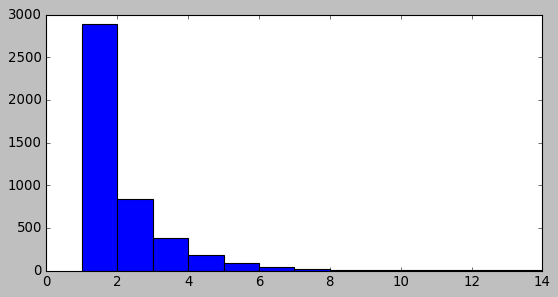

In [70]:
plt.figure(figsize=(8,4)) 
y,x=np.histogram(count, bins = 13, range=(1,14))
plt.hist(count, bins = 13, range=(1,14))
y

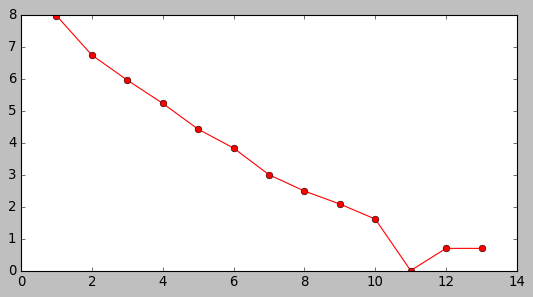

In [68]:
plt.figure(figsize=(8,4))
plt.plot(x[:-1],np.log(y),'ro-')

### It just means that there are a lost of isolated express saccade. but let's see how the express saccades in trials between exploration. should be compare them to random? test the ditribution to poisson fit: which can tell us if the chances of these express saccades are just random or their is 

In [33]:
df1.columns

Index(['trial', 'trialstart', 'trialstop', 'ITIstart', 'ITIend', 'fixOn',
       'fixAcq', 'fixOff', 'fixHoldTime', 'overlap', 'whichTargOn', 'targOn',
       'targAcq', 'targOff', 'juiceTime', 'trialFeedbackT', 'totalFeedbackT',
       'rwd', 'choice', 'correct', 'rewarded', 'rwdDice', 'chosenTargOrigin',
       'jackpot', 'stimTrial', 'stimSOA', 'stimOnAfter', 'stimOnTime', 'theta',
       'probe', 'forced', 't1Rwd', 'targ1origin', 't2Rwd', 'targ2origin',
       't3Rwd', 'targ3origin', 'contrastIndex', 'contrasts', 'error',
       'errortype', 'eyedata', 'pcTime', 'trackerTime', 'trackerOffset',
       'block', 'rt', 'switch', 'state', 'eye', 'animal_date'],
      dtype='object')

In [11]:
df = df1[['state', 'switch', 'stimTrial', 'rewarded','choice', 'correct',
          't1Rwd','t2Rwd','t3Rwd','animal_date','targOn','targAcq','rt']]

df = df.dropna()
# df['explore'] = np.where((df['state'] == 1), 1,0)
# df = df[df['explore'] ==1]
df['rewarded']

1       1.0
2       0.0
3       0.0
4       1.0
6       1.0
       ... 
1624    1.0
1625    1.0
1627    0.0
1628    1.0
1630    0.0
Name: rewarded, Length: 30684, dtype: float64

In [12]:
reward_pass = np.where((df['choice'] == 1), df['t1Rwd'], 0)
reward_pass = np.where((df['choice'] == 2), df['t2Rwd'], reward_pass)
reward_pass = np.where((df['choice'] == 3), df['t3Rwd'], reward_pass)
    

In [13]:
df['real_rwd'] = reward_pass
df['express_sacc'] = np.where((df['rt'] > 0.09)&(df['rt'] < 0.15) , 1, 0)

In [14]:
rwd_hist = []
for i,j in enumerate(df['express_sacc']):
    if j == 1:
        rwd_hist.append(np.sum(df['rewarded'][i-5:i]))
        

In [15]:
rwd_hist_not_sacc = []
for i,j in enumerate(df['express_sacc']):
    if j == 0:
        rwd_hist_not_sacc.append(np.sum(df['rewarded'][i-5:i]))


Text(0, 0.5, 'probability of saccades')

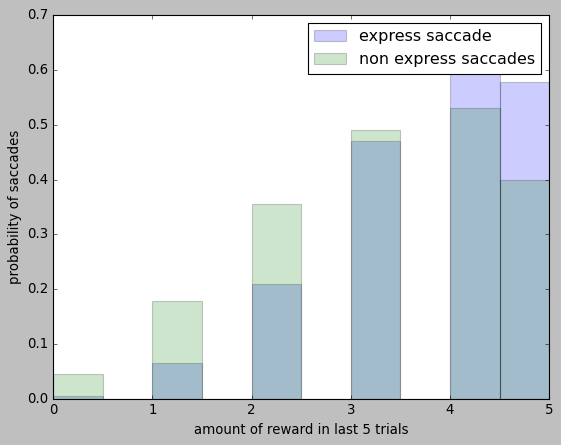

In [16]:
_ = plt.hist(rwd_hist,  alpha = 0.2, density=True)
_ = plt.hist(rwd_hist_not_sacc,alpha = 0.2,  density = True)
plt.legend(('express saccade', 'non express saccades'))
plt.xlabel('amount of reward in last 5 trials')
plt.ylabel('probability of saccades')


In [50]:
df.t1Rwd.unique()

array([70, 60, 50, 40, 30, 80, 90], dtype=int16)

### look into the reward history with the target - 'was the monkey making choices if same target was giving juice everytime and then making choice accordingly'